# Starter Classes

These are classes that will be used throughout the project. 

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores
from Utilities.utilities import pipeline_transform

# Import Data

Here we will import the data, view it, and scale it as well as impute missing values

In [189]:
#Get Data

raw_data = import_data("richard_rppa_labeled_raw2.csv", "C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/raw_data").drop("Unnamed: 0", axis=1).drop("replicate", axis=1)
raw_data_subsets = import_data("protein_list.csv", "C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/raw_data")

#For doing NS v KRAS
raw_data_KRAS = raw_data.loc[raw_data["target"] == 'KRAS_'].drop("target", axis=1).reset_index().drop("index", axis=1)
raw_data_KRAS["construct"] = raw_data_KRAS["construct"].replace('si1', 'KD')
raw_data_KRAS["construct"] = raw_data_KRAS["construct"].replace('si2', 'KD')

#For doing NS v MYC
raw_data_MYC = raw_data.loc[raw_data["target"] == 'MYC_'].drop("target", axis=1).reset_index().drop("index", axis=1)
raw_data_MYC["construct"] = raw_data_MYC["construct"].replace('si1', 'KD')
raw_data_MYC["construct"] = raw_data_MYC["construct"].replace('si2', 'KD')

#For Doing Cell Line
raw_data_all = raw_data.drop("target", axis=1).drop("construct", axis=1)

#For doing both NS vs KRAS and MYC
raw_data_KVM = raw_data.copy()
raw_data_KVM["construct"] = raw_data_KVM["construct"].replace('si1', 'KD')
raw_data_KVM["construct"] = raw_data_KVM["construct"].replace('si2', 'KD')
raw_data_KVM["treatment"] = raw_data_KVM["target"] + raw_data_KVM["construct"]
cols = list(raw_data_KVM)
cols.insert(1, cols.pop(cols.index('treatment')))
raw_data_KVM = raw_data_KVM.loc[:, cols].drop("target", axis=1).drop("construct", axis=1).reset_index().drop("index", axis=1)

#For doing KRAS-KD vs MYC-KD
raw_data_KVM_ONLY = raw_data.copy().loc[raw_data["construct"] != 'NS']
raw_data_KVM_ONLY["construct"] = raw_data_KVM_ONLY["construct"].replace('si1', 'KD')
raw_data_KVM_ONLY["construct"] = raw_data_KVM_ONLY["construct"].replace('si2', 'KD')
raw_data_KVM_ONLY["treatment"] = raw_data_KVM_ONLY["target"] + raw_data_KVM_ONLY["construct"]
cols = list(raw_data_KVM_ONLY)
cols.insert(1, cols.pop(cols.index('treatment')))
raw_data_KVM_ONLY = raw_data_KVM_ONLY.loc[:, cols].drop("target", axis=1).drop("construct", axis=1).reset_index().drop("index", axis=1)

raw_data_KRAS

,cell.line,construct,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
0,Pa02C,NS,24,12406.795700,17623.709890,2895.752232,12887.327570,8973.223334,12040.122680,18676.102380,...,13932.782800,20723.013600,23155.79126,8708.018526,20599.037100,14661.79503,8217.324422,8839.626408,1026.592162,22471.44021
1,Pa02C,KD,24,11510.326090,15646.460310,2134.526005,5110.229313,8160.004256,11695.970110,15398.112230,...,16010.495520,22247.840550,21741.98506,6522.415047,17854.305490,14086.89836,6627.611662,7684.799377,896.053265,21504.12018
2,Pa02C,KD,24,11719.394930,17623.709890,7879.345508,3681.223477,12016.068240,13849.442410,21439.698930,...,15662.120930,21547.168340,20619.65478,9681.774215,15756.369290,13863.29117,6535.471984,7646.477698,709.811937,20910.35886
3,Pa02C,NS,24,11407.199930,15898.813880,7480.089800,7398.262074,6476.917767,7465.145653,18582.952810,...,14100.984560,21439.698930,20557.88318,9367.489950,17606.087870,14129.21270,9376.856974,8030.484774,1164.445099,21741.98506
4,Pa02C,KD,24,12619.516710,15568.421490,11849.016110,6317.004507,9996.597241,9136.200571,19457.743720,...,16432.227530,22697.265480,19970.27960,9395.628092,17085.753900,14632.48891,7585.547076,7715.605256,923.342343,20434.91407
5,Pa02C,KD,24,12797.431670,17925.860540,7244.512282,6620.991001,9461.627931,9480.568748,18416.459820,...,16187.593410,21850.948870,18958.36203,8459.118249,14185.852150,13794.14613,6721.050363,6904.993694,790.764231,20070.36420
6,Pa02C,NS,24,11114.434910,28001.119520,27722.497380,6884.307969,10456.720020,10342.329730,20170.969630,...,13333.036010,20723.013600,23388.51619,14457.960960,20272.079350,14617.87176,8919.540562,8955.296120,1036.909328,22247.84055
7,Pa02C,KD,24,11968.103440,25336.475180,15002.920720,4628.553042,7863.603705,8038.514860,16399.398290,...,15138.553790,20455.347960,21461.15803,10689.320390,17535.809260,14472.41820,7339.309348,7934.694180,911.416568,21611.91251
8,Pa02C,KD,24,12136.834520,25336.475180,14400.235060,6904.993694,9779.070576,9730.296144,18788.487670,...,14559.521290,20475.821820,20619.65478,9662.422203,15584.004000,13918.86462,5925.381041,7244.512282,644.194008,19890.54483
9,Pa02C,NS,24,11591.180680,24834.767990,27173.568630,9798.646868,6904.993694,7186.791558,18863.804650,...,13095.180520,18939.405490,23623.55756,14764.787200,19110.626140,14691.14583,9847.763916,8777.965357,1124.394666,22026.46579


In [216]:
# Transform Data to proper scale 

#Isolate attributes based on numbers or objects
cleaned_data = pipeline_transform(raw_data_KVM_ONLY)
cleaned_data = cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data

,AKT.PKB.alpha.S473,AKT.S473,AKT.T308,AMPKalpha1.S485,AMPKbeta1.S108,ASK1.S83,ATG5,ATM.S1981,ATR.S428,AURORA.A.T288.B.T232.C.T198,...,p27.Kip1,p27.T187,p38MAPK.T180.Y182,p53.S15,p62.SQSTM1,p70S6.Kinase,p70S6.Kinase.S371,p70S6.T389,p90RSK.S380,time
0,12695.468000,2134.526005,5110.229313,11192.508550,10383.778890,14809.137790,7237.275366,8160.004256,16155.237510,1361.034131,...,3793.332410,6741.245538,5984.927773,0.000045,5733.034681,7684.799377,12606.91043,10188.349000,2494.890269,24.0
1,15835.350230,7879.345508,3681.223477,14779.551250,11214.914340,18620.153200,5767.533782,12016.068240,14913.164970,1445.195699,...,3827.625821,6093.635547,6118.057130,0.000045,4875.605721,7646.477698,14720.55539,9818.271712,3692.281166,24.0
2,18977.319450,11849.016110,6317.004507,12581.711630,10582.957450,15032.954400,7631.193853,9996.597241,14086.898360,1513.227441,...,3597.519019,7108.172340,6721.050363,0.000045,4939.404787,7715.605256,11684.28640,9283.553563,3751.832035,24.0
3,15819.516400,7244.512282,6620.991001,14371.465460,11036.905870,14271.216920,7738.788835,9461.627931,13711.635020,1433.680404,...,3662.862879,6204.311928,6444.613267,0.000045,4242.889013,6904.993694,11968.10344,8586.956208,3543.961101,24.0
4,18233.208810,15002.920720,4628.553042,11944.181500,13082.099070,12431.644170,5784.863864,7863.603705,15475.297360,1384.369114,...,3622.789886,7079.791741,6815.806400,0.000045,5318.786597,7934.694180,17979.72353,9358.123358,3999.800132,24.0
5,18863.804650,14400.235060,6904.993694,14705.836250,12606.910430,13480.504700,5925.381041,9779.070576,15851.184790,1344.799212,...,3684.904518,6981.365676,7487.569518,0.000045,4812.635296,7244.512282,17034.56903,8777.965357,3551.055601,24.0
6,16333.936460,8647.275510,4242.889013,11521.846830,12040.122680,13725.359060,7266.280337,6700.922079,14285.501050,1332.750554,...,3558.164304,6647.526076,6039.039941,0.000045,4693.812697,12759.105760,18807.29316,8501.520728,3035.099991,24.0
7,17872.175950,15168.859000,4689.119335,14314.098560,11373.026660,13974.647530,6457.514455,8795.537581,14588.667350,1369.224941,...,3384.629937,6348.663296,7179.605456,0.000045,4225.952580,7065.647332,16531.12584,9045.291786,3637.312481,24.0
8,24343.018710,35242.226780,6911.898344,15184.041580,13359.726830,12369.639670,6620.991001,8308.211304,14574.080080,1689.182833,...,3271.488673,5513.747352,7009.345032,0.000045,3291.175179,5710.144556,17000.53640,9274.279745,7361.362245,24.0
9,17783.036060,12900.226550,7442.781845,14823.960320,11754.597750,11660.942870,6348.663296,9172.815901,14472.418200,1563.997025,...,3748.084137,5802.246019,6451.063712,0.000045,3568.855750,5854.700903,13711.63502,8535.592440,5796.444329,24.0


# Ready for Plotting and Graphing

Here you can use can visualize data and do any number of correlation matricies etc. 

Cleaned data item:
cleaned_data

In [13]:
#cleaned_data.to_csv('imputed_csv_sam.csv', sep=',')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 160 entries, time to si2
dtypes: float64(160)
memory usage: 300.1 KB


In [155]:
cleaned_data = cleaned_data.loc[cleaned_data['ly3'] > 1,:]
cleaned_data = cleaned_data.drop('ly3', axis=1)
cleaned_data = pd.DataFrame(cleaned_data)

In [14]:
cleaned_data.describe()

,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,Chk.1.S345,...,HPAFII,PANC1,Pa02C,Pa14C,Pa16C,KRAS_,MYC_,NS,si1,si2
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,48.000000,10664.403778,17049.899151,9041.072402,7753.096465,8366.702098,9586.615396,12806.859418,24391.086222,8799.149289,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.500000,0.500000,0.333333,0.333333,0.333333
std,24.050157,2000.094325,13841.842968,10430.558408,3425.722403,1821.078664,2415.015596,6846.322123,4879.644586,3993.381666,...,0.400836,0.400836,0.400836,0.400836,0.400836,0.501045,0.501045,0.472390,0.472390,0.472390
min,24.000000,2307.684588,2445.488178,0.000045,1866.835564,3398.194585,3398.194585,2812.980601,14720.555390,85.114701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,9609.602458,7484.057167,1818.372315,5203.049423,7106.395467,7893.145233,7095.746572,20201.254157,5949.138646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,10646.641440,13187.200635,6186.102480,6908.446019,8514.280688,9311.490366,10239.419480,24100.796110,8901.831875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
75%,72.000000,12091.400948,20231.847500,12016.140425,9669.680529,9395.646673,11421.471962,18685.449098,27446.673810,11450.108148,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,15851.184790,72402.751400,58688.527410,24343.018710,15615.200930,16647.249170,32532.678110,38561.144130,18545.826730,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


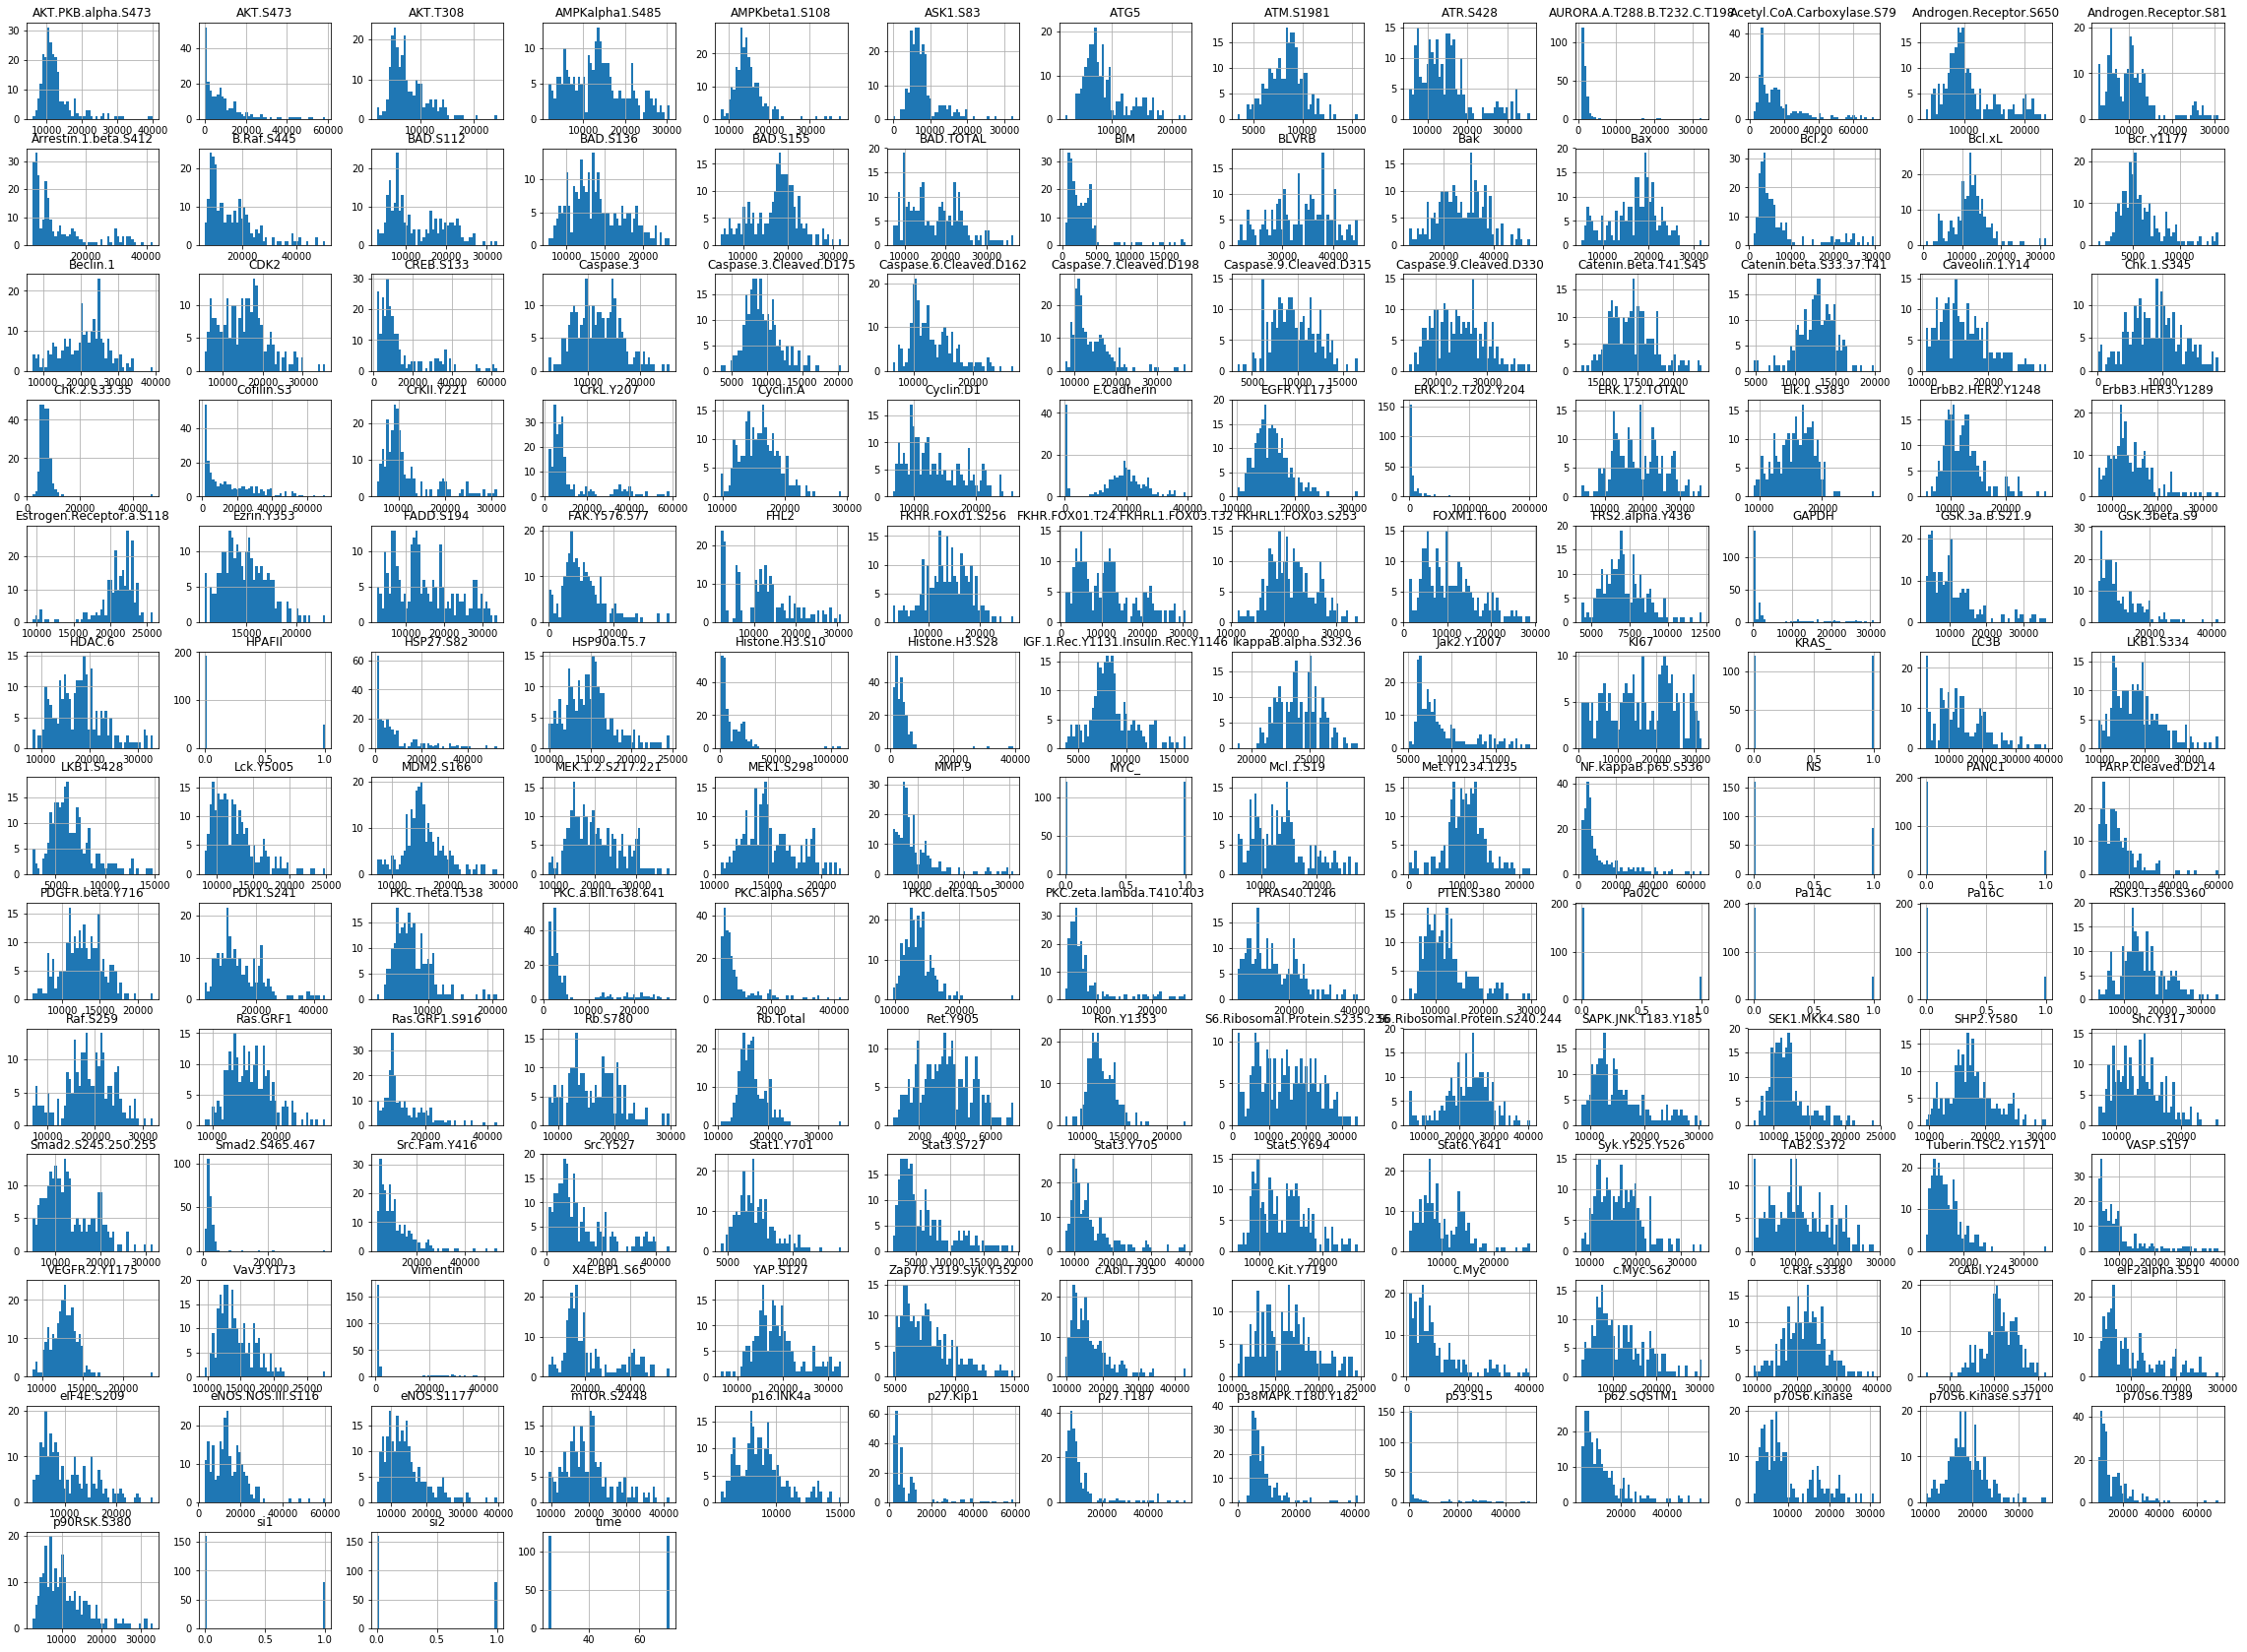

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.hist(bins=50, figsize=(40,30))
plt.show()

In [217]:
corr_matrix = cleaned_data.corr()

In [218]:
corr_matrix_spear = cleaned_data.corr(method='spearman')
corr_matrix_spear.reindex(sorted(corr_matrix_spear.columns), axis=1)
pvalue_matrix_spear = pd.DataFrame(ss.spearmanr(cleaned_data).pvalue)



In [ ]:
sns.set()

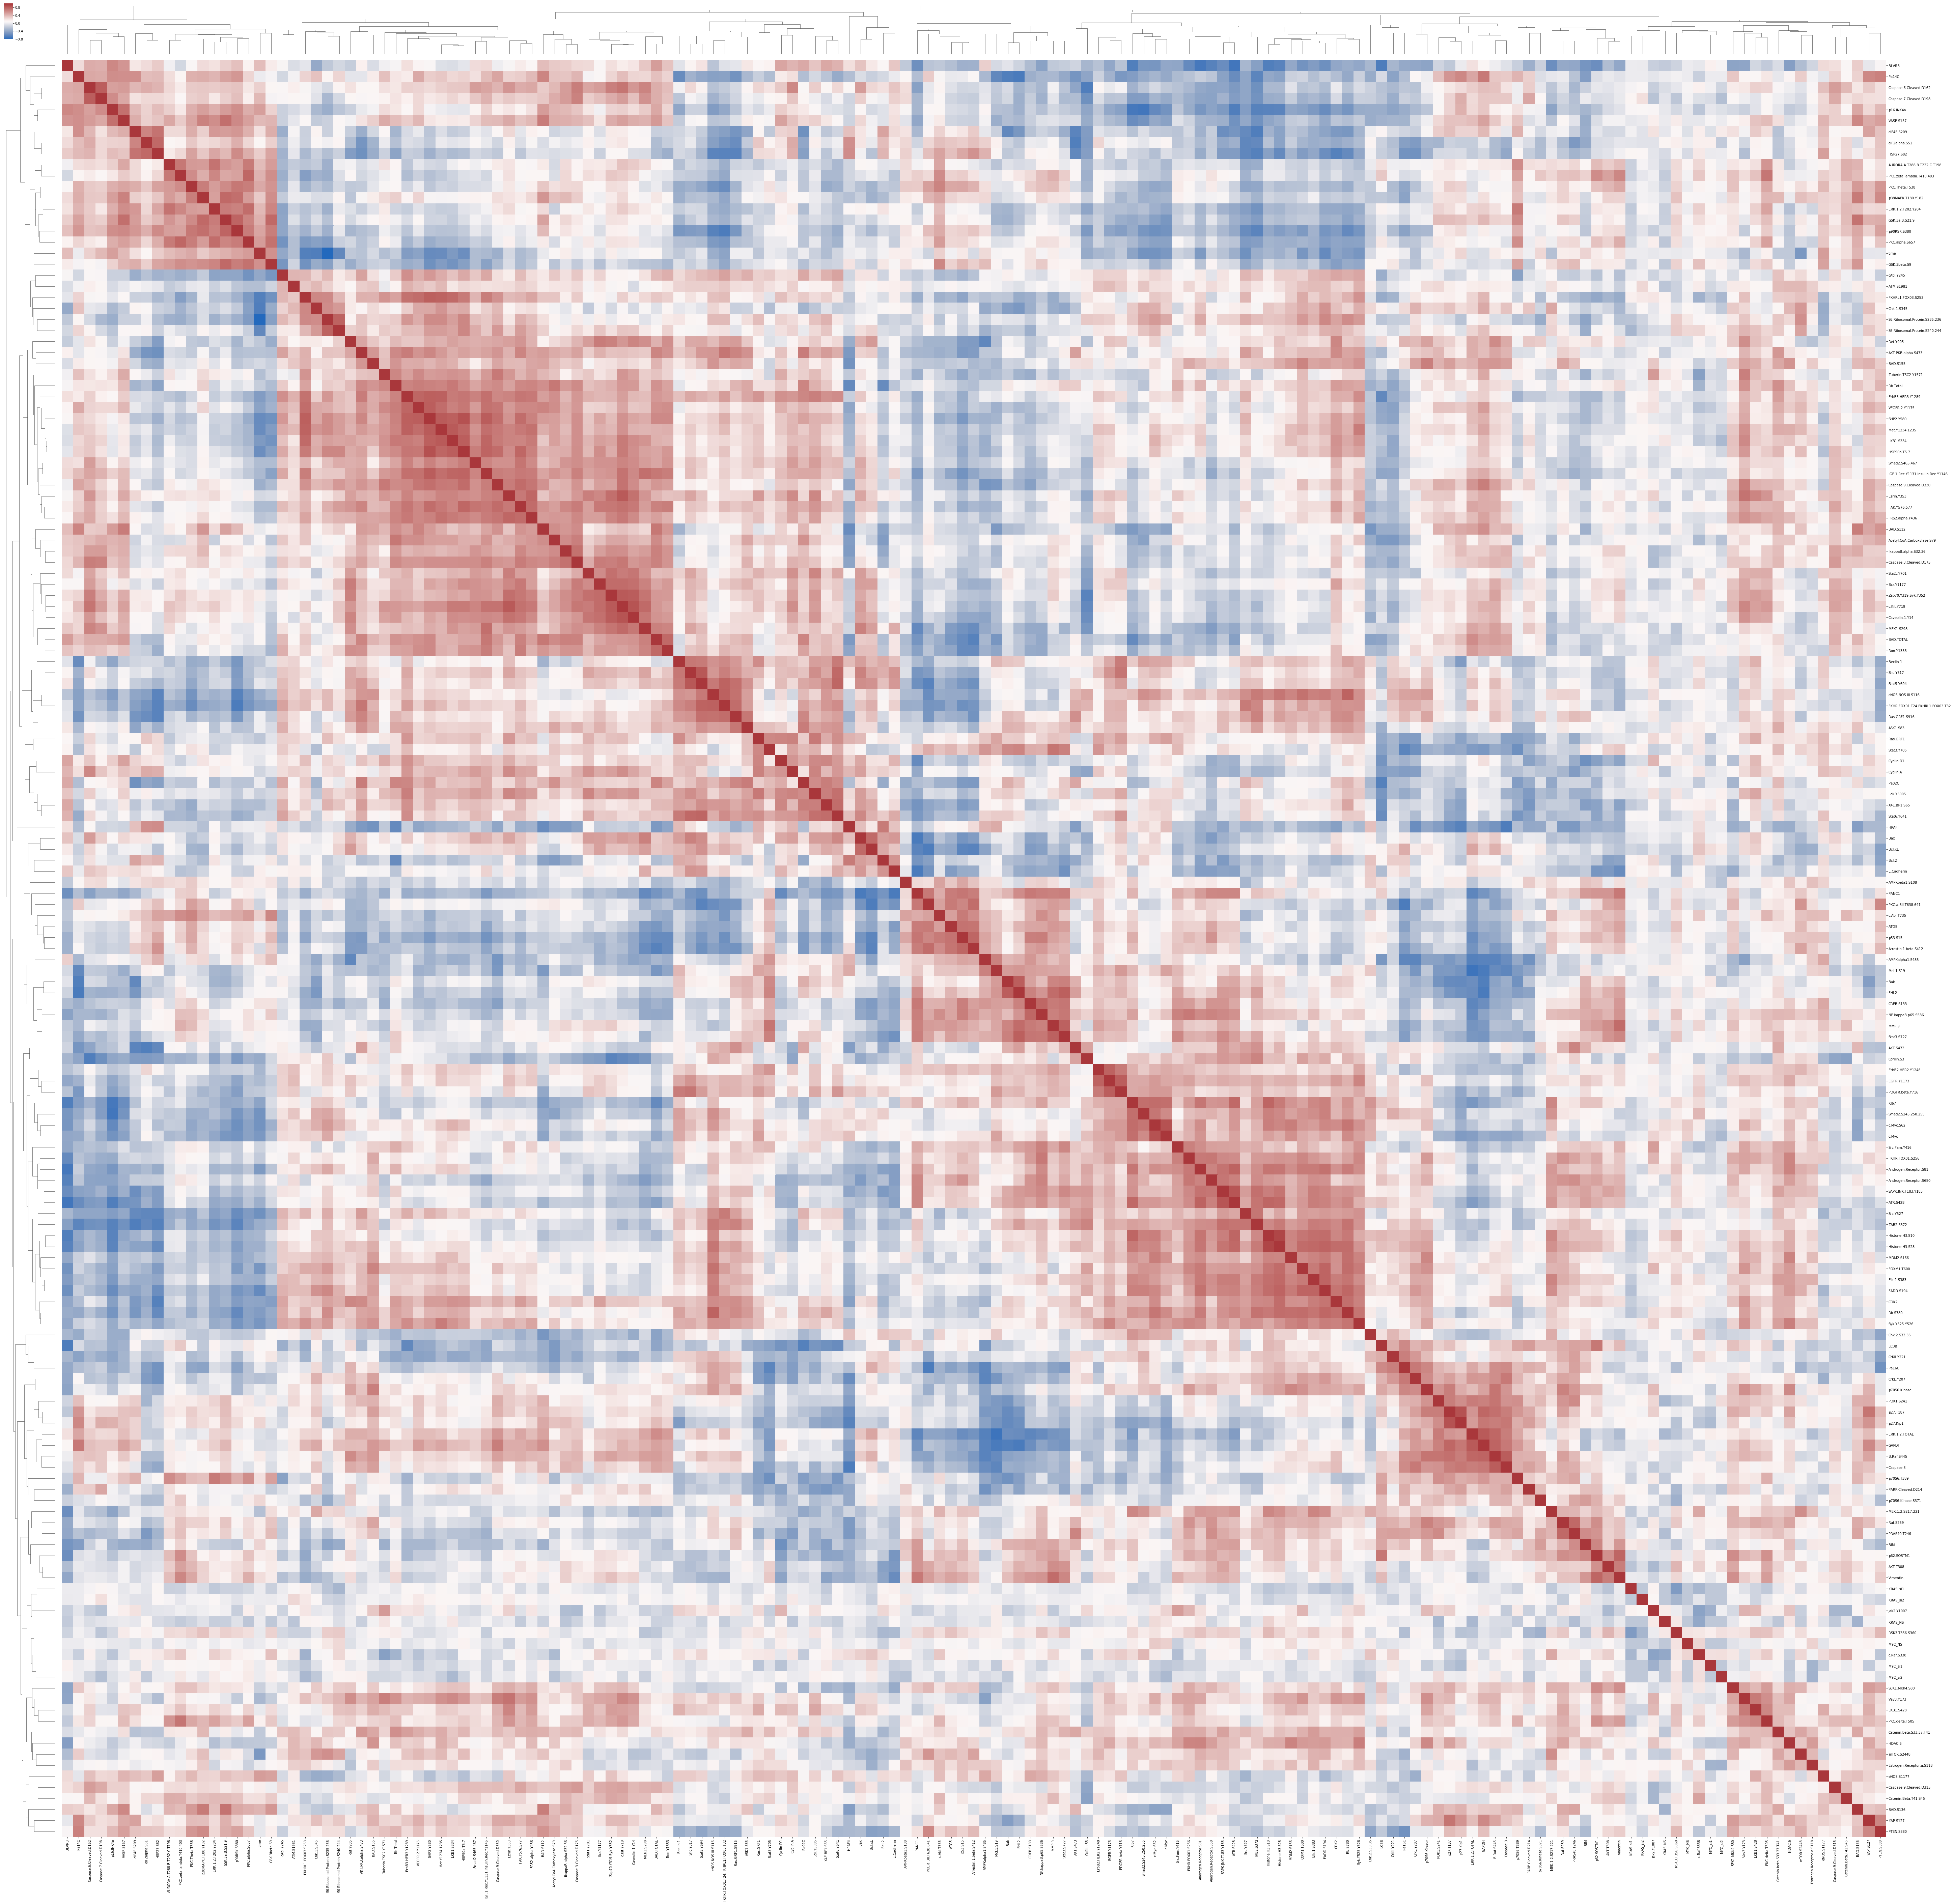

In [24]:

#color pallete used for all heatmaps
pls = sns.husl_palette(8, s=.45)

#overall cluster map
dims = (100, 100)
sns_whole = sns.clustermap(corr_matrix_spear, figsize=dims, cmap="vlag")
sns_whole.savefig("richard_whole.png", dpi = 'figure')

In [61]:
raw_data_subsets

,MAPK.AKT,RTKs,apoptosis,cell.cycle,cytoskeleton,dna,metabolism,core
0,PKC.alpha.S657,AKT.S473,AKT.S473,ATM.S1981,c.Abl.Y245,CREB.S133,Acetyl.CoA.S79,ERK.1.2.T202.Y204
1,X4E.BP1.S65,AKT.T308,AKT.T308,c.Abl.Y245,Cofilin.S3,CrkL.Y207,FKHR.FOX01.T24.FKHRL1.FOX03.T32,ERK.1.2.TOTAL
2,AKT.S473,ATM.S1981,ATM.S1981,Chk.1.S345,eNOS.NOSIII.S116,HDAC6,FKHR.FOX01.S256,p90RSK.S380
3,AKT.T308,c.Abl.Y245,BAD.S112,CDK2,Src.Fam.Y416,Histone.H3.S10,FKHRL1.FOX03.S253,RSK3.T356.360
4,ASK1.S83,ErbB2.HER2.Y1248,c.Abl.Y245,Smad2.S465.467,Src.Y527,Histone.H3.S28,FOXM1.T600,c.Myc.S62
5,Arrestin.1.beta.S412,ERK.1.2.T202.Y204,Cleaved.Caspase.9.D315,Smad2.S245.250.255,c.Abl.T735,c.Myc.S62,Beclin.1,c.Myc
6,B.Raf.S445,CDK2,Cleaved.Caspase.9.D330,c.Abl.T735,Bcr.Y1177,c.Myc,p62.SQSTM1,MEK1.S298
7,Bcr.Y1177,SAPK.JNK.T183.Y185,ERK.1.2.T202.Y204,p16.INK4a,Catenin.beta.S33.37.T41,Smad2.S465.467,Biliverdin.Reductase.B,MEK.1.2.S217.S221
8,CREB.S133,SEK1.MKK4.S80,FADD.S194,PLK1.T210,Catenin.B.T41.S45,Smad2.S245.250.255,AMPKalpha.T172,AKT.S473
9,CrKII.Y221,Src.Fam.Y416,FKHR.FOX01.T24.FKHRL1.FOX03.T32,KI67,Caveolin.1.Y14,YAP.S127,AMPKalpha1.S485,AKT.T308


In [219]:
vector_Core = raw_data_subsets["core"].dropna().reindex()

vector_MAPK = raw_data_subsets["MAPK.AKT"].dropna().reindex()
vector_MAPK = set(list(vector_MAPK) + list(vector_Core))
vector_MAPK = pd.DataFrame(list(vector_MAPK))
vector_MAPK = vector_MAPK[0]

vector_RTK = raw_data_subsets["RTKs"].dropna().reindex()
vector_RTK =  set(list(vector_RTK) + list(vector_Core))
vector_RTK = pd.DataFrame(list(vector_RTK))
vector_RTK = vector_RTK[0]

vector_Apoptosis = raw_data_subsets["apoptosis"].dropna().reindex()
vector_Apoptosis = set(list(vector_Apoptosis) + list(vector_Core))
vector_Apoptosis = pd.DataFrame(list(vector_Apoptosis))
vector_Apoptosis = vector_Apoptosis[0]

vector_Cell = raw_data_subsets["cell.cycle"].dropna().reindex()
vector_Cell = set(list(vector_Cell) + list(vector_Core))
vector_Cell = pd.DataFrame(list(vector_Cell))
vector_Cell = vector_Cell[0]

vector_Cytoskeleton = raw_data_subsets["cytoskeleton"].dropna().reindex()
vector_Cytoskeleton = set(list(vector_Cytoskeleton) + list(vector_Core))
vector_Cytoskeleton = pd.DataFrame(list(vector_Cytoskeleton))
vector_Cytoskeleton = vector_Cytoskeleton[0]

vector_DNA = raw_data_subsets["dna"].dropna().reindex()
vector_DNA = set(list(vector_DNA) + list(vector_Core))
vector_DNA = pd.DataFrame(list(vector_DNA))
vector_DNA = vector_DNA[0]

vector_Metabolism = raw_data_subsets["metabolism"].dropna().reindex()
vector_Metabolism = set(list(vector_Metabolism) + list(vector_Core))
vector_Metabolism = pd.DataFrame(list(vector_Metabolism))
vector_Metabolism = vector_Metabolism[0]

vector_MAPK

0                             HSP27.S82
1     IGF.1.Rec.Y1131.Insulin.Rec.Y1146
2                        RSK3.T356.S360
3                         ERK.1.2.TOTAL
4                                  KI67
5                        PKC.Theta.T538
6                            Stat6.Y641
7                          Src.Fam.Y416
8                             TAB2.S372
9                            p70S6.T389
10                       PKC.alpha.S657
11                            Bcr.Y1177
12             PKC.zeta.lambda.T410.403
13                            Mcl.1.S19
14                            MEK1.S298
15                          PRAS40.T246
16                             Ret.Y905
17                             Shc.Y317
18                             ASK1.S83
19                         p70S6.Kinase
20                          X4E.BP1.S65
21                           Stat1.Y701
22                     MEK.1.2.S217.221
23                             AKT.S473
24                      FRS2.alpha.Y436


In [220]:
to_plot_core = corr_matrix_spear.loc[vector_Core, vector_Core]
to_plot_mapk = corr_matrix_spear.loc[vector_MAPK, vector_MAPK]
to_plot_RTK = corr_matrix_spear.loc[vector_RTK, vector_RTK]
to_plot_apoptosis = corr_matrix_spear.loc[vector_Apoptosis, vector_Apoptosis]
to_plot_cell = corr_matrix_spear.loc[vector_Cell, vector_Cell]
to_plot_cytoskeleton = corr_matrix_spear.loc[vector_Cytoskeleton, vector_Cytoskeleton]
to_plot_dna = corr_matrix_spear.loc[vector_DNA, vector_DNA]
to_plot_metabolism = corr_matrix_spear.loc[vector_Metabolism, vector_Metabolism]


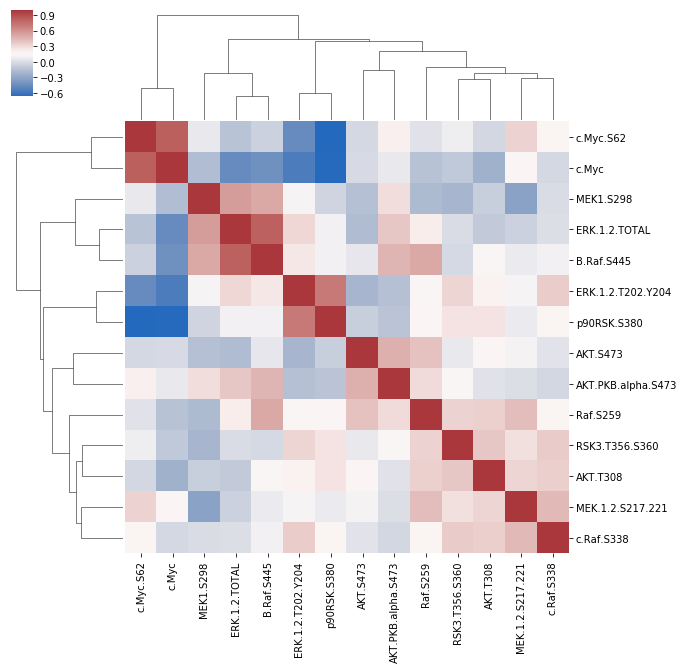

In [221]:
dims = (10, 10)
sns_core = sns.clustermap(to_plot_core, figsize=dims, cmap="vlag")
sns_core.savefig("richard_core_kvm_only.png")

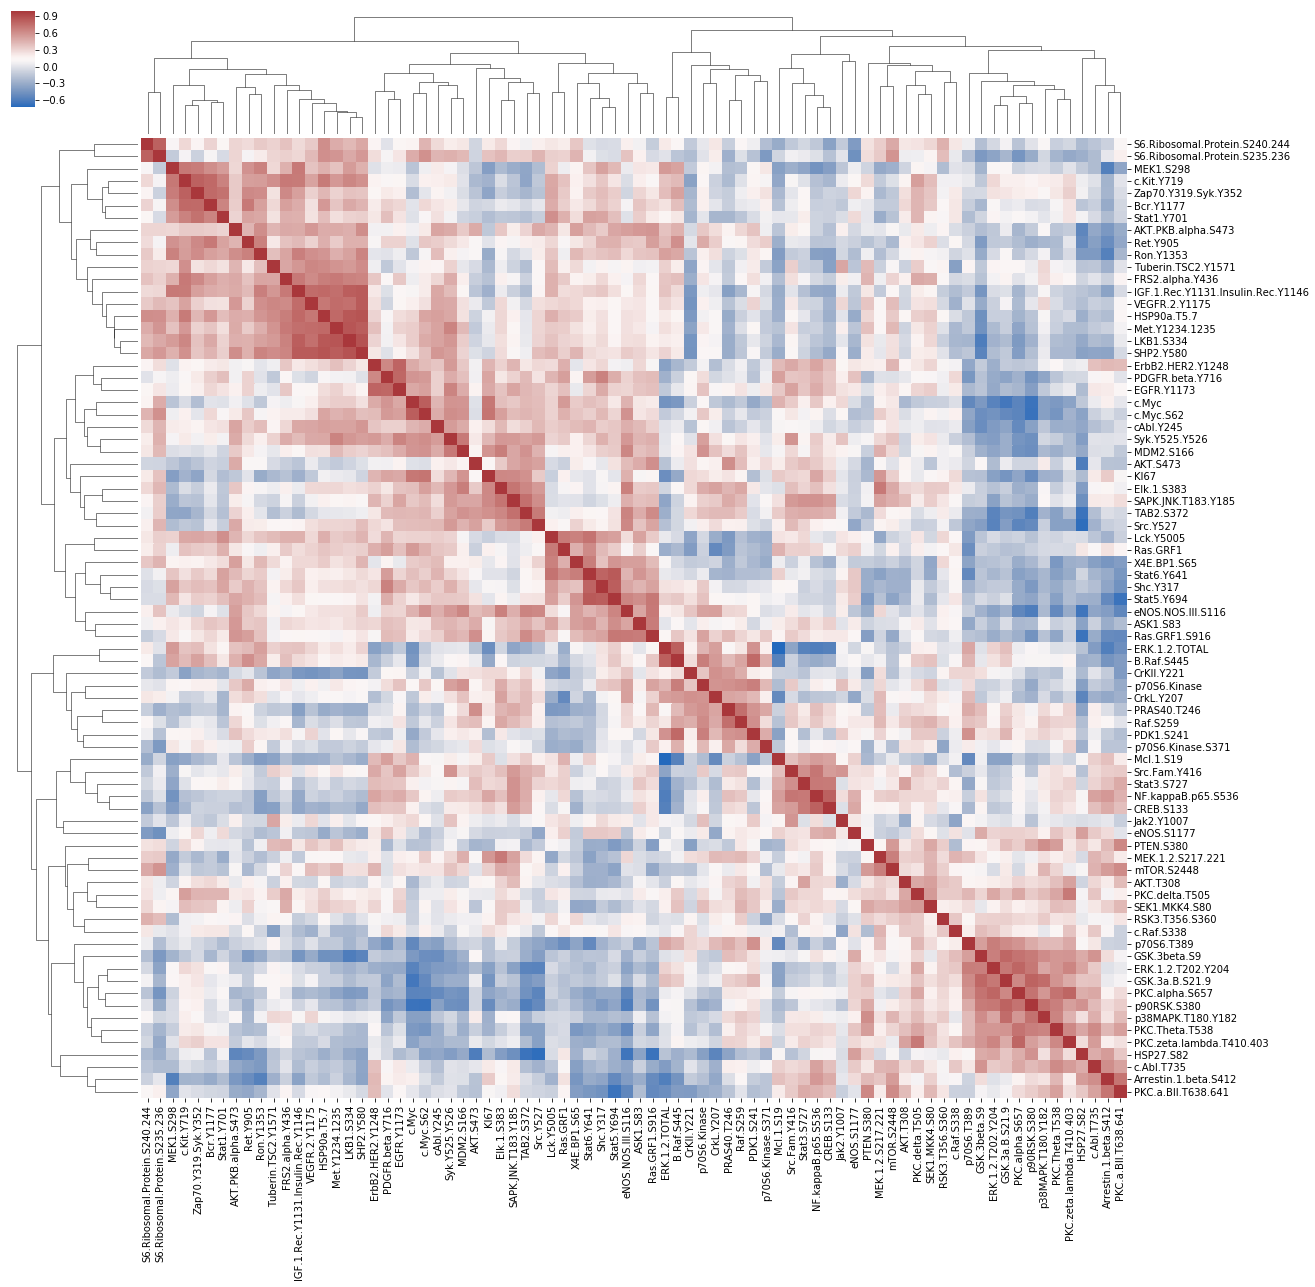

In [222]:
dims = (20, 20)
sns_mapk = sns.clustermap(to_plot_mapk, figsize=dims, cmap="vlag")
sns_mapk.savefig("richard_mapk_kvm_only.png")

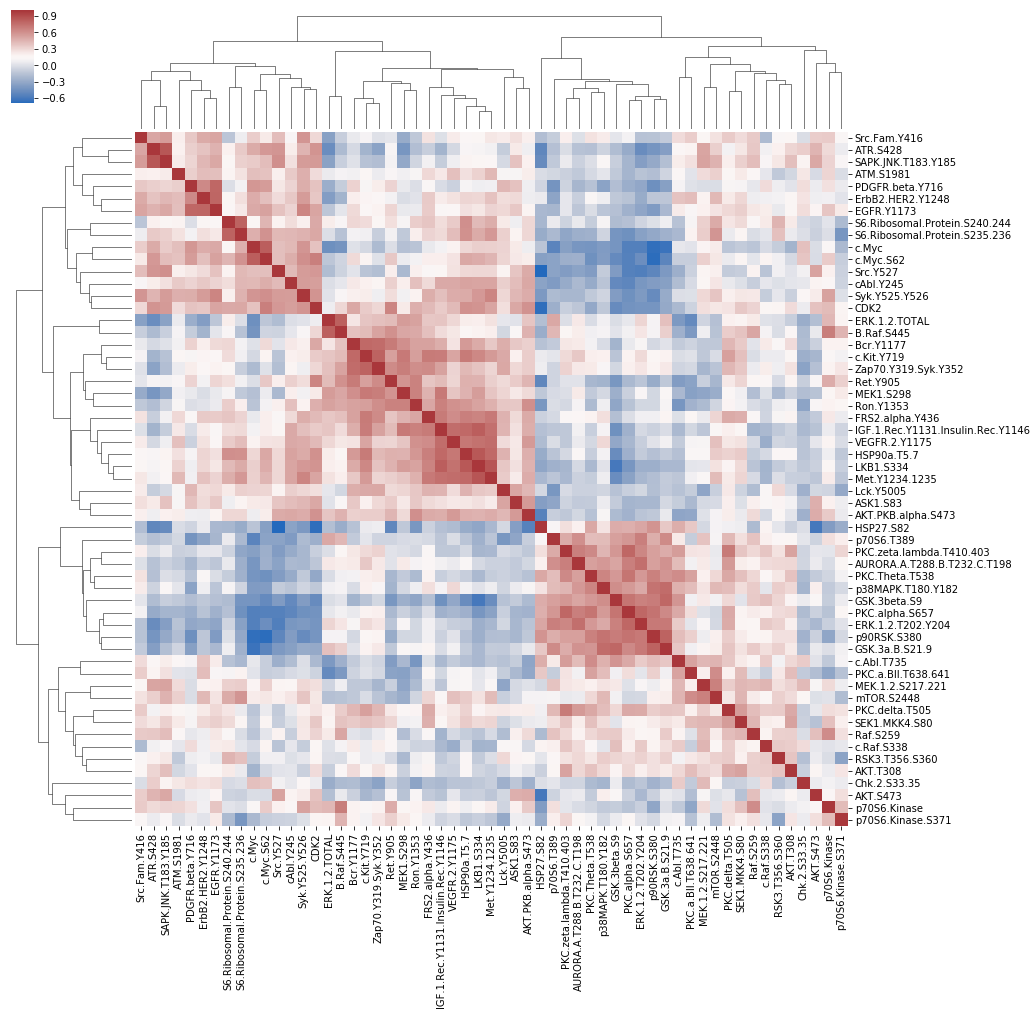

In [223]:
dims = (15, 15)
sns_rtk = sns.clustermap(to_plot_RTK, figsize=dims, cmap="vlag")
sns_rtk.savefig("richard_rtk_kvm_only.png")

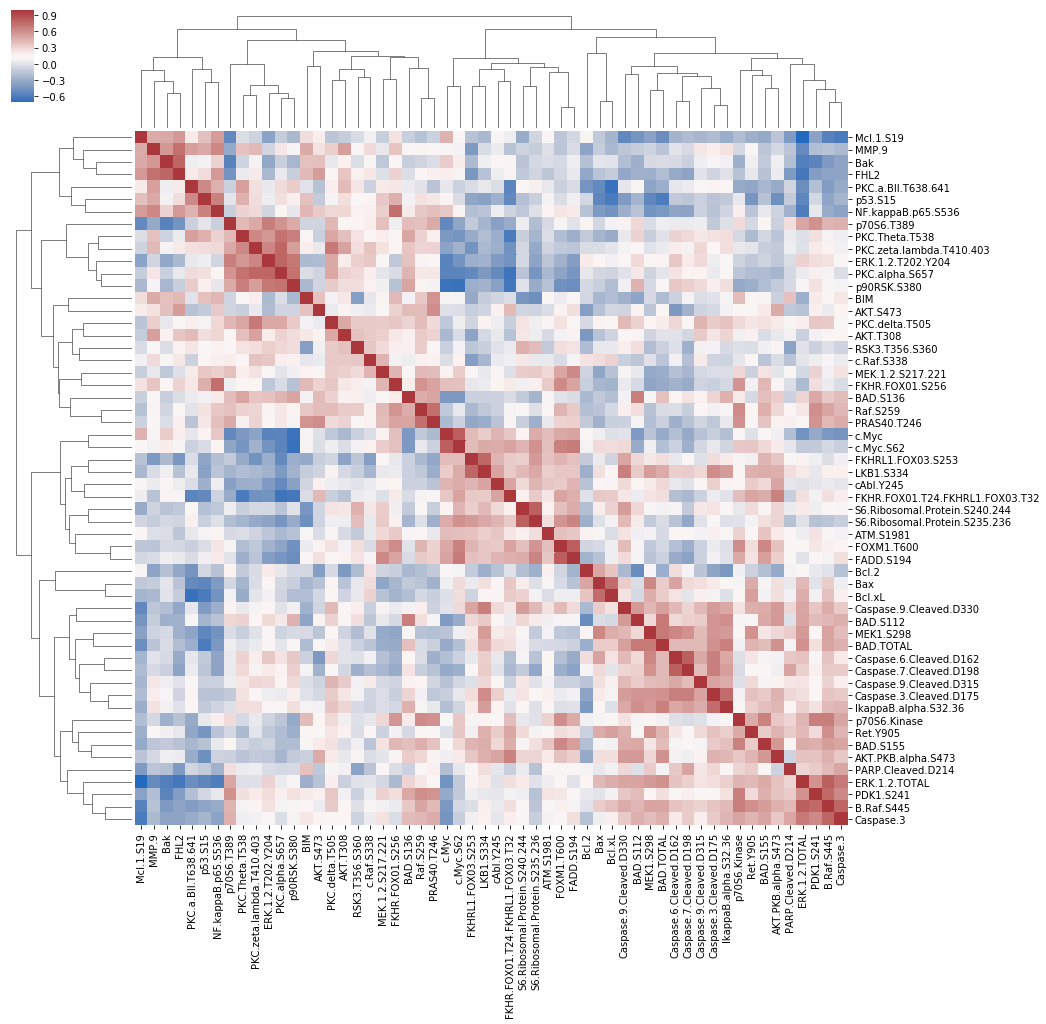

In [224]:
dims = (15, 15)
sns_apoptosis = sns.clustermap(to_plot_apoptosis, figsize=dims, cmap="vlag")
sns_apoptosis.savefig("richard_apoptosis_kvm_only.png")

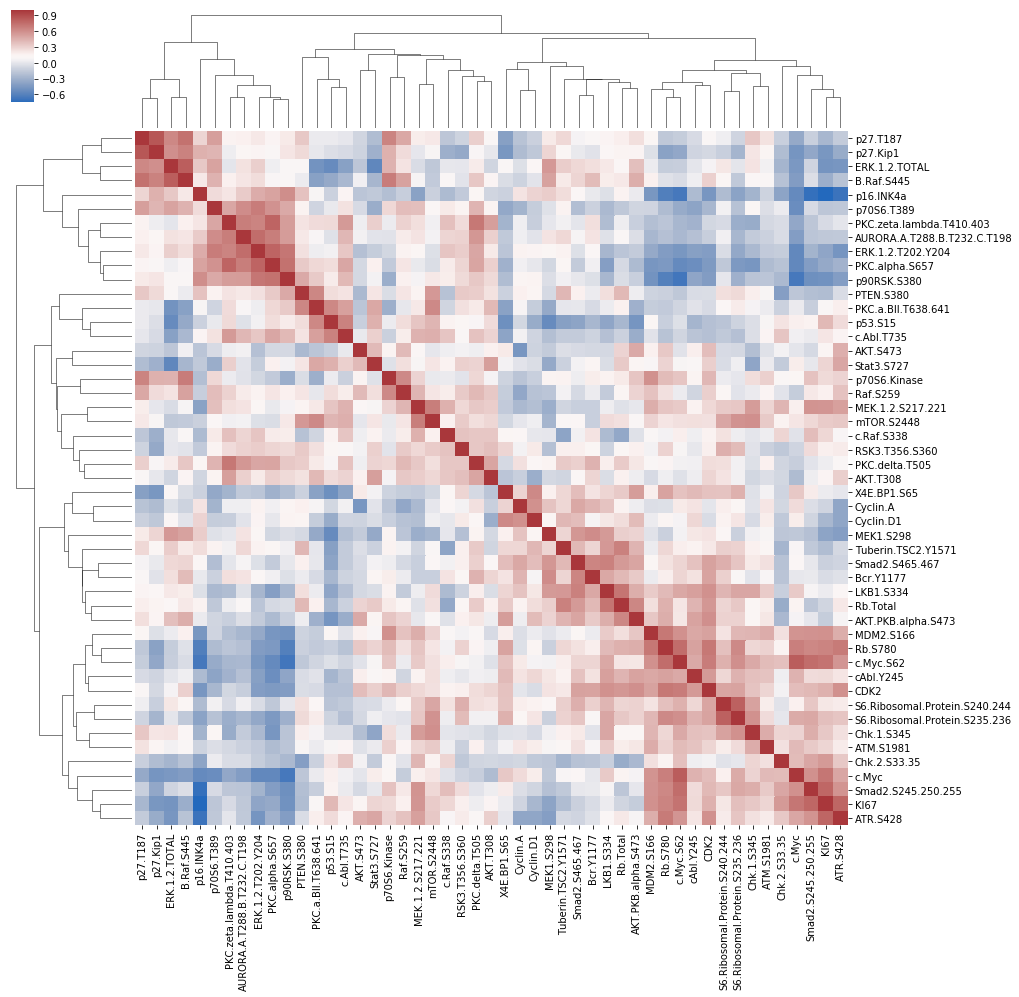

In [225]:
dims = (15, 15)
sns_cell = sns.clustermap(to_plot_cell, figsize=dims, cmap="vlag")
sns_cell.savefig("richard_cell_kvm_only.png")

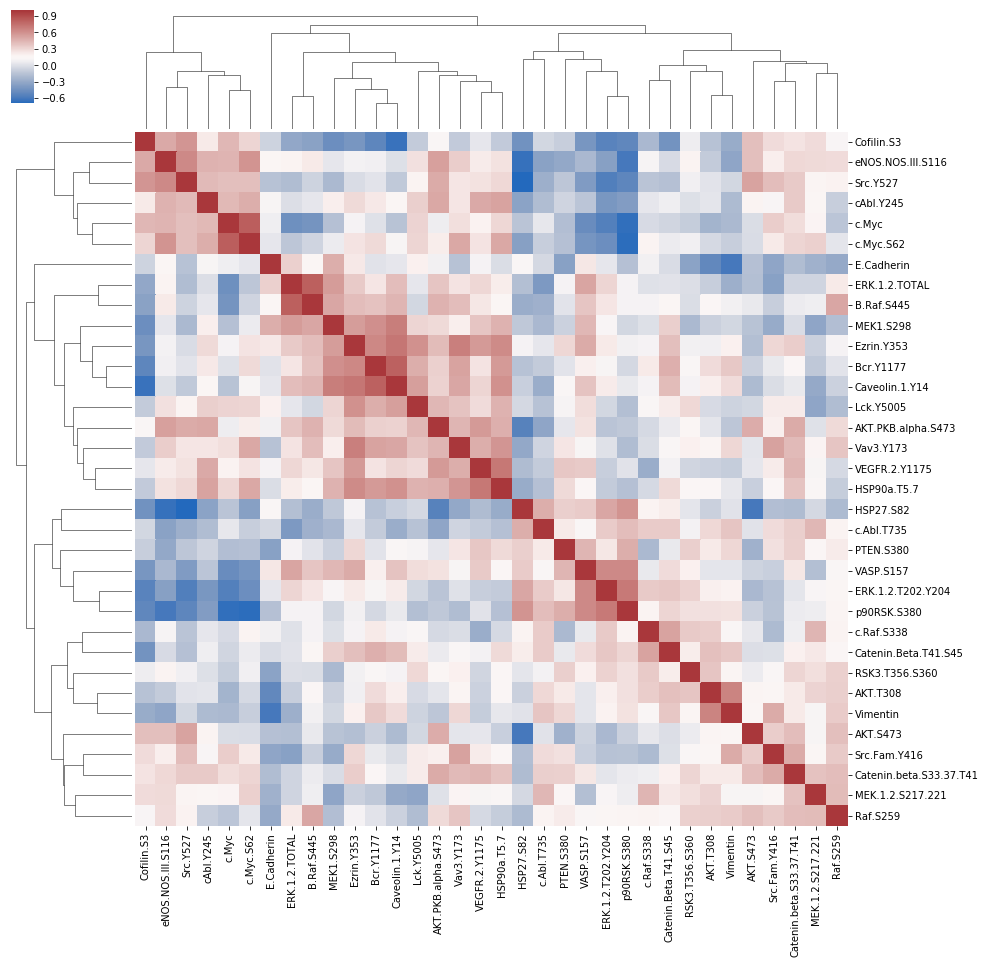

In [226]:
dims = (15, 15)
sns_cyto = sns.clustermap(to_plot_cytoskeleton, figsize=dims, cmap="vlag")
sns_cyto.savefig("richard_cyto_kvm_only.png")

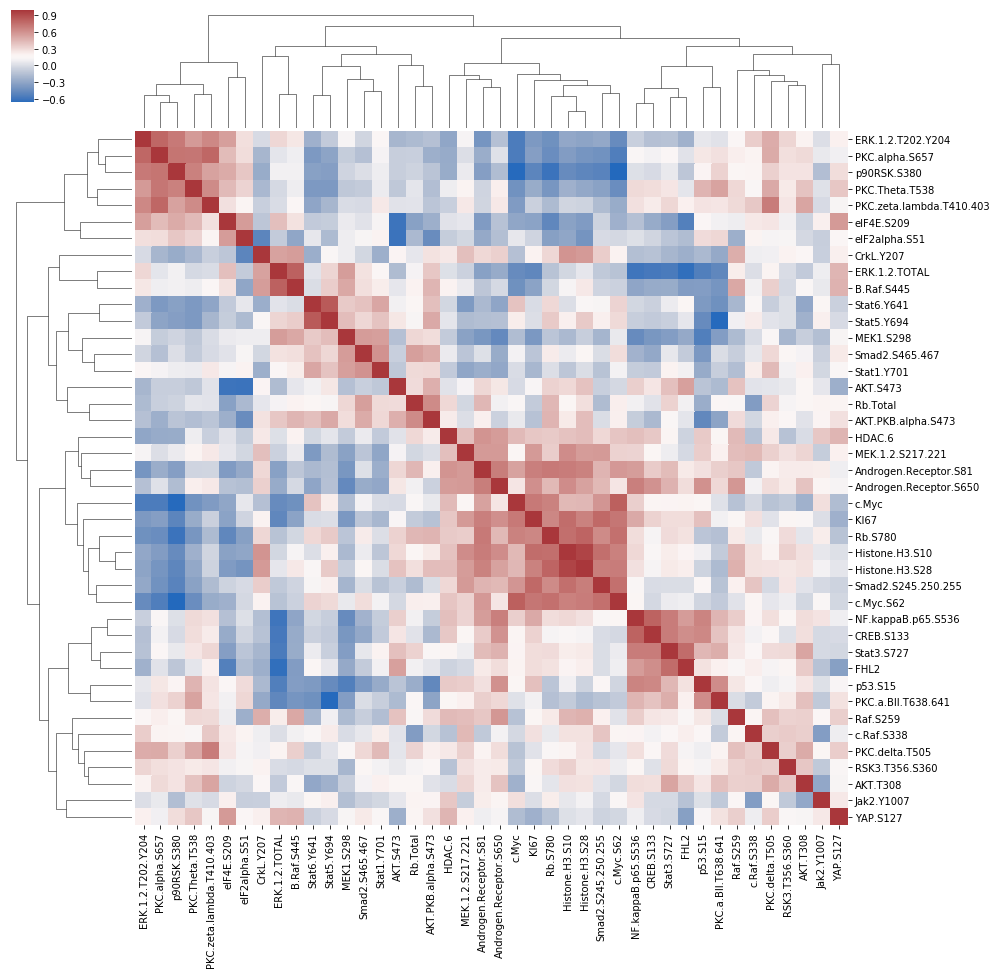

In [227]:
dims = (15, 15)
sns_dna = sns.clustermap(to_plot_dna, figsize=dims, cmap="vlag")
sns_dna.savefig("richard_dna_kvm_only.png")

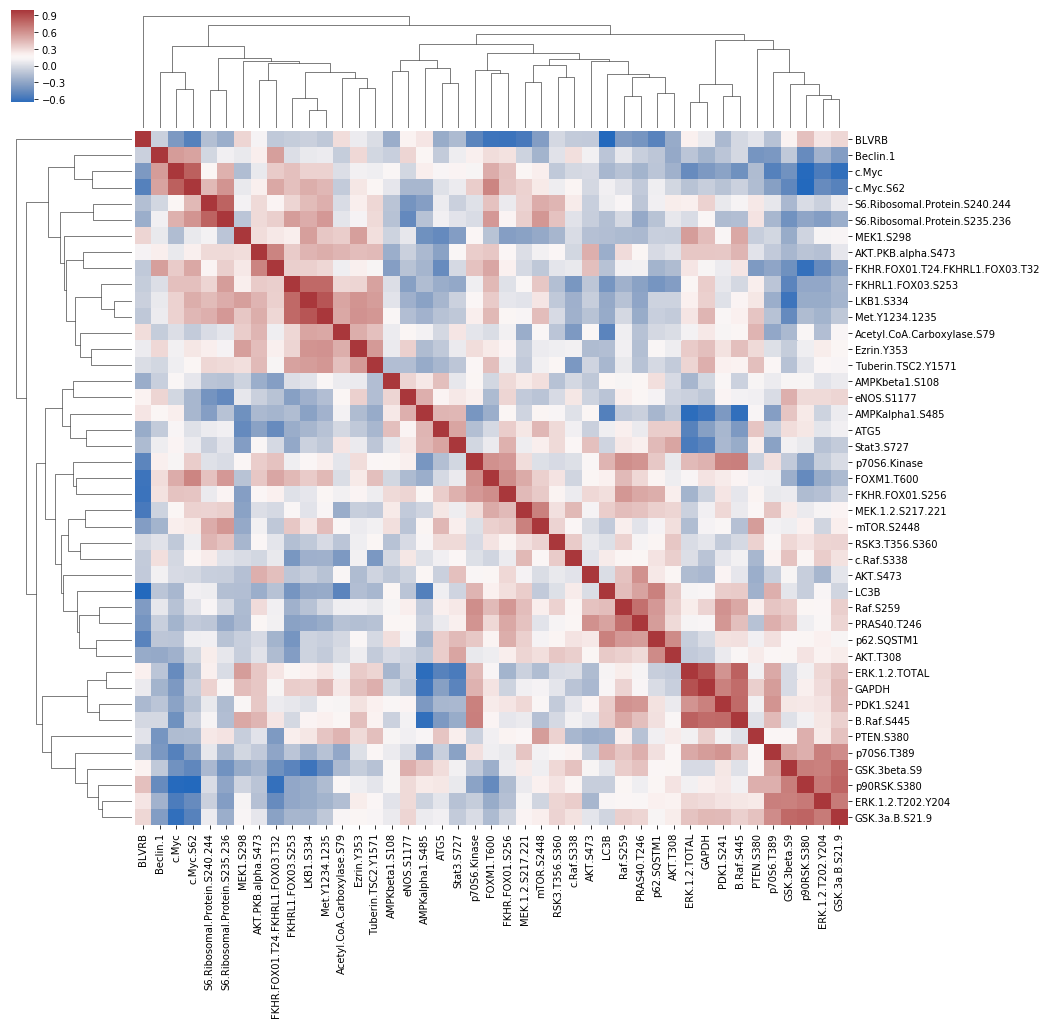

In [228]:
dims = (15, 15)
sns_meta = sns.clustermap(to_plot_metabolism, figsize=dims, cmap="vlag")
sns_meta.savefig("richard_meta_kvm_only.png")

In [ ]:
raw_data_subsets

In [ ]:
dims = (100, 60)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(corr_matrix_spear, ax=ax, cmap=pls)

In [ ]:
corr_matrix_spear.keys()

In [ ]:
corr_matrix_spear["c-Myc "].sort_values(ascending=False)

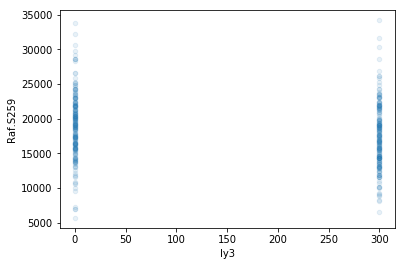

In [16]:
cleaned_data.plot(kind="scatter", x="", y="Raf.S259", alpha=0.1)

In [ ]:
cleaned_data.plot(kind="scatter", x="c-Myc ", y="BAD S136 ", alpha=0.1)

In [ ]:
cleaned_data.plot(kind="scatter", x="c-Myc ", y="A-Raf S299", alpha=0.1)